# Import libraries

In [ ]:
import os
import datetime
import glob
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Read data

In [ ]:
!cp '/content/drive/MyDrive/Research/Spring 2021/IVS_data/DataForADAI_sg.csv' .
!cp '/content/drive/MyDrive/Research/Spring 2021/IVS_data/DataForADAI_eu.csv' .
!cp '/content/drive/MyDrive/Research/Spring 2021/IVS_data/DataForADAI_jp.csv' .

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
df = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "final.csv", index=False, encoding='utf-8-sig')

In [ ]:
df.head()

,timestamp,clientip,ident,auth,verb,request,httpversion,region,response,bytes,referrer,android_ver_browser,day_of_week_color,user_agent.device,user_agent.os.name,user_agent.os.version,user_agent.os.full,user_agent.version,user_agent.build,user_agent.name,AppName
0,1600992002,NaN,-,-,POST,NaN,1.1,IE,200.0,933.0,NaN,NaN,Fri,iPhone,iOS,12.4.8,iOS 12.4.8,12.4.8,NaN,Mobile Safari UI/WKWebView,NaN
1,1600992003,NaN,-,-,POST,NaN,1.1,IE,200.0,782.0,NaN,NaN,Fri,iPhone,iOS,12.4.8,iOS 12.4.8,12.4.8,NaN,Mobile Safari UI/WKWebView,NaN
2,1600992004,NaN,-,-,OPTIONS,NaN,1.0,IE,200.0,110.0,NaN,NaN,Fri,Other,Ubuntu,NaN,NaN,NaN,NaN,Other,NaN
3,1600992006,NaN,-,-,OPTIONS,NaN,1.0,IE,200.0,110.0,NaN,NaN,Fri,Other,Ubuntu,NaN,NaN,NaN,NaN,Other,NaN
4,1600992007,NaN,-,-,OPTIONS,NaN,1.0,IE,200.0,110.0,NaN,NaN,Fri,Other,Ubuntu,NaN,NaN,NaN,NaN,Other,NaN


# Pre-processing CSV

## Get datetime from the timestamp

In [ ]:
#df = df[5::50]
date_time  = pd.to_datetime(df.pop('timestamp'), unit='s')
date_time

0         2020-09-25 00:00:02
1         2020-09-25 00:00:03
2         2020-09-25 00:00:04
3         2020-09-25 00:00:06
4         2020-09-25 00:00:07
                  ...        
1377995   2020-12-23 09:01:23
1377996   2020-12-23 09:01:23
1377997   2020-12-23 09:01:23
1377998   2020-12-23 09:01:23
1377999   2020-12-23 09:01:27
Name: timestamp, Length: 3921752, dtype: datetime64[ns]

## Create new datetime column

In [ ]:
df['DATETIME'] = date_time

df.head()

,clientip,ident,auth,verb,request,httpversion,region,response,bytes,referrer,android_ver_browser,day_of_week_color,user_agent.device,user_agent.os.name,user_agent.os.version,user_agent.os.full,user_agent.version,user_agent.build,user_agent.name,AppName,DATETIME
0,NaN,-,-,POST,NaN,1.1,IE,200.0,933.0,NaN,NaN,Fri,iPhone,iOS,12.4.8,iOS 12.4.8,12.4.8,NaN,Mobile Safari UI/WKWebView,NaN,2020-09-25 00:00:02
1,NaN,-,-,POST,NaN,1.1,IE,200.0,782.0,NaN,NaN,Fri,iPhone,iOS,12.4.8,iOS 12.4.8,12.4.8,NaN,Mobile Safari UI/WKWebView,NaN,2020-09-25 00:00:03
2,NaN,-,-,OPTIONS,NaN,1.0,IE,200.0,110.0,NaN,NaN,Fri,Other,Ubuntu,NaN,NaN,NaN,NaN,Other,NaN,2020-09-25 00:00:04
3,NaN,-,-,OPTIONS,NaN,1.0,IE,200.0,110.0,NaN,NaN,Fri,Other,Ubuntu,NaN,NaN,NaN,NaN,Other,NaN,2020-09-25 00:00:06
4,NaN,-,-,OPTIONS,NaN,1.0,IE,200.0,110.0,NaN,NaN,Fri,Other,Ubuntu,NaN,NaN,NaN,NaN,Other,NaN,2020-09-25 00:00:07


# Processing data

## Get number of error connections for various devices

Lấy số lượng truy cập bị lỗi từ 3 loại thiết bị: Thiết bị sử dụng hệ điều hành Android, iOS và khác.

In [ ]:
# This is force algorithm, and hard code :( because I am not a pandas experter.

# iOS error connection

ios_err = df[df['response'] != 200.0]#.groupby('DATETIME')['response'].count()

ios_err = ios_err[ ios_err['user_agent.os.name'] == 'iOS' ]#.groupby('DATETIME')['response'].count() 

ios_err = ios_err.resample('H', on='DATETIME')["response"].apply(lambda x: x[x != 200.0].count())


# Android error connection

and_err = df[df['response'] != 200.0]#.groupby('DATETIME')['response'].count()

and_err = and_err[ and_err['user_agent.os.name'] == 'Android' ]#.groupby('DATETIME')['response'].count() 

and_err = and_err.resample('H', on='DATETIME')["response"].apply(lambda x: x[x != 200.0].count())

# Other error connection

other_err = df[df['response'] != 200.0]#.groupby('DATETIME')['response'].count()

other_err = other_err[ other_err['user_agent.os.name'] != 'Android' ]#.groupby('DATETIME')['response'].count() 

other_err = other_err[ other_err['user_agent.os.name'] != 'iOS' ]#.groupby('DATETIME')['response'].count() 

other_err = other_err.resample('H', on='DATETIME')["response"].apply(lambda x: x[x != 200.0].count())


## Calculate sum of error Connections

Tính tổng số lượng truy cập lỗi nếu response trả về khác 200

In [ ]:
err = df.resample('H', on='DATETIME')["response"].apply(lambda x: x[x != 200.0].count())
err

DATETIME
2020-09-25 00:00:00      0
2020-09-25 01:00:00    121
2020-09-25 02:00:00      4
2020-09-25 03:00:00      2
2020-09-25 04:00:00     16
                      ... 
2020-12-23 05:00:00      0
2020-12-23 06:00:00      0
2020-12-23 07:00:00      0
2020-12-23 08:00:00      0
2020-12-23 09:00:00      0
Freq: H, Name: response, Length: 2146, dtype: int64

## Calcuate sum of connections

Tính tổng số lượng truy cập của các user

In [ ]:
all = df.resample('H', on='DATETIME')["response"].count()

In [ ]:
all

DATETIME
2020-09-25 00:00:00    10007
2020-09-25 01:00:00    12878
2020-09-25 02:00:00    18277
2020-09-25 03:00:00     3980
2020-09-25 04:00:00    63178
                       ...  
2020-12-23 05:00:00      208
2020-12-23 06:00:00      303
2020-12-23 07:00:00      187
2020-12-23 08:00:00      590
2020-12-23 09:00:00      278
Freq: H, Name: response, Length: 2146, dtype: int64

## Calcuate average of bytes

Tính trung bình bytes mỗi giờ mà user truy cập. 

In [ ]:
average_bytes = df.resample('H', on='DATETIME')["bytes"].mean()
average_bytes

DATETIME
2020-09-25 00:00:00    1018.504047
2020-09-25 01:00:00    1121.729306
2020-09-25 02:00:00    1061.134814
2020-09-25 03:00:00     995.270352
2020-09-25 04:00:00     963.157222
                          ...     
2020-12-23 05:00:00     995.024038
2020-12-23 06:00:00    1032.363036
2020-12-23 07:00:00    1162.791444
2020-12-23 08:00:00    1081.113559
2020-12-23 09:00:00    1027.525180
Freq: H, Name: bytes, Length: 2146, dtype: float64

# New DataFrame

In this section, we will convert the old .csv to new dataframe which the data can be "useful:("

Trong phần này, chúng ta sẽ cố gắng xử lý dữ liệu để phục vụ bài toán của mình. Vì dữ liệu raw ban đầu không giúp ích được gì nhiều cho việc dự đoán số lượng truy cập lỗi mỗi ngày nên ta sẽ xử lý dữ liệu có ý nghĩa hơn.

In [ ]:
new_df = pd.DataFrame(data=all,dtype=np.int32)

In [ ]:
new_df = new_df.rename(columns={'response': 'All Connections'})
new_df.head()

,All Connections
DATETIME,
2020-09-25 00:00:00,10007
2020-09-25 01:00:00,12878
2020-09-25 02:00:00,18277
2020-09-25 03:00:00,3980
2020-09-25 04:00:00,63178


In [ ]:
new_df['Error Connection'] = err # Add column
new_df['iOS Error Connection'] = ios_err
new_df['Android Error Connection'] = and_err
new_df['Other Error Connection'] = other_err
new_df['Average Bytes'] = average_bytes
#new_df['DATETIME'] = df.DATETIME.dt.date#.unique

## Convert datetime index to column in new dataframe

Do các dữ liệu được xử lý dựa trên cột datetime (tính theo hour) nên cột datetime là một dạng index của bảng mới new_df, nên nếu muốn datetime như một cột thì cần phải convert index to column. Thực ra không cần phải convert hay cần datetime trên bảng ghi, nhưng mình cứ làm thế cho dễ dàng xử lý dữ liệu ở các bước tiếp theo

In [ ]:
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'DATETIME'})

new_df.head()

,DATETIME,All Connections,Error Connection,iOS Error Connection,Android Error Connection,Other Error Connection,Average Bytes
0,2020-09-25 00:00:00,10007,0,NaN,NaN,0.0,1018.504047
1,2020-09-25 01:00:00,12878,121,NaN,NaN,121.0,1121.729306
2,2020-09-25 02:00:00,18277,4,NaN,NaN,4.0,1061.134814
3,2020-09-25 03:00:00,3980,2,NaN,NaN,2.0,995.270352
4,2020-09-25 04:00:00,63178,16,NaN,NaN,16.0,963.157222


## Check NaN values

Kiểm tra các giá trị NaN và gán bằng 0

In [ ]:
new_df = new_df.fillna(0.0)

In [ ]:
new_df.head()

,DATETIME,All Connections,Error Connection,iOS Error Connection,Android Error Connection,Other Error Connection,Average Bytes
0,2020-09-25 00:00:00,10007,0,0.0,0.0,0.0,1018.504047
1,2020-09-25 01:00:00,12878,121,0.0,0.0,121.0,1121.729306
2,2020-09-25 02:00:00,18277,4,0.0,0.0,4.0,1061.134814
3,2020-09-25 03:00:00,3980,2,0.0,0.0,2.0,995.270352
4,2020-09-25 04:00:00,63178,16,0.0,0.0,16.0,963.157222


In [ ]:
date_time = pd.to_datetime(new_df.pop('DATETIME'))#, format='%d.%m.%Y %H:%M:%S')

## Visualization

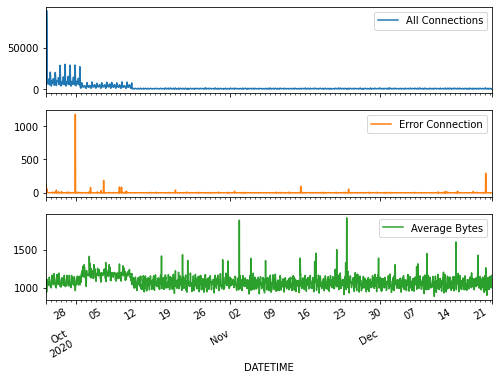

In [ ]:
plot_cols = ['All Connections', 'Error Connection','Average Bytes']
plot_features = new_df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

## Statistic

Thống kê và đánh giá dữ liệu

In [ ]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
All Connections,2146.0,1827.216682,4430.763642,84.0000,473.00000,697.500000,1038.250000,95022.000000
Error Connection,2146.0,1.608574,27.064502,0.0000,0.00000,0.000000,0.000000,1180.000000
iOS Error Connection,2146.0,0.019571,0.182163,0.0000,0.00000,0.000000,0.000000,4.000000
Android Error Connection,2146.0,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000
Other Error Connection,2146.0,1.589003,27.063195,0.0000,0.00000,0.000000,0.000000,1180.000000
Average Bytes,2146.0,1078.513812,77.509956,881.9022,1028.10962,1072.834247,1120.624288,1924.385321


## Feature engineering 

Đây là một trong những bước quan trọng nhất trong việc xử lý dữ liệu, trước khi đưa dữ liệu vào mô hình huấn luyện, ta cần phải thực sự hiểu dữ liệu. Những gì dữ liệu nào cần thiết cho bài toán, mối tương quan correlation hay định dạng dữ liệu sao cho phù hợp nhất. 

Trong trường hợp này, dữ liệu gốc không có quá nhiều ý nghĩa nên việc xử lý dữ liệu hết sức khó khăn. Bởi vì xử lý cũng không đem lại mức độ hiệu quả cao; ví dụ như đào đá chế biến rất khác đào vàng chế biến. Dữ liệu ban đầu không đủ tốt để có thể tiếp cận bài toán trên.

Text(0, 0.5, 'Average Bytes')

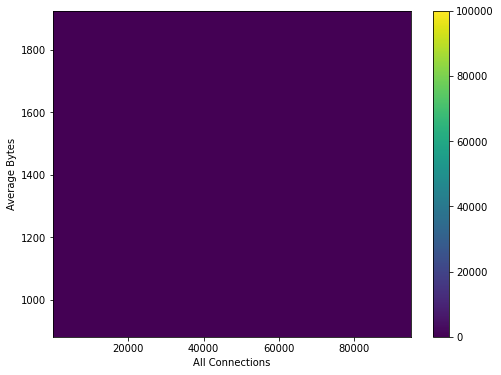

In [ ]:
plt.hist2d(new_df['All Connections'], new_df['Average Bytes'], bins=(50, 50), vmax=100000)
plt.colorbar()
plt.xlabel('All Connections')
plt.ylabel('Average Bytes')

## Define time for each input

Mỗi record đều bao gồm thời gian, do thời gian có dạng chuỗi nên không tốt cho việc đưa vào mô hình. Ở đây, chúng ta sử dụng hàm sin và cos để biến đổi thời gian của mỗi record về một dạng số.

Text(0.5, 1.0, 'Time of day signal')

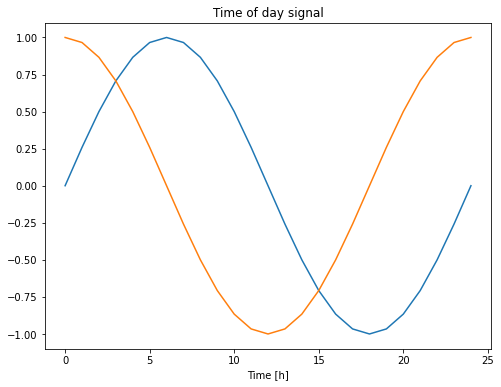

In [ ]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

new_df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
new_df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
new_df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
new_df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [ ]:
new_df.head()

,All Connections,Error Connection,iOS Error Connection,Android Error Connection,Other Error Connection,Average Bytes,Day sin,Day cos,Year sin,Year cos
0,10007,0,0.0,0.0,0.0,1018.504047,-5.263295e-12,1.000000,-0.994577,-0.104007
1,12878,121,0.0,0.0,121.0,1121.729306,2.588190e-01,0.965926,-0.994651,-0.103294
2,18277,4,0.0,0.0,4.0,1061.134814,5.000000e-01,0.866025,-0.994725,-0.102581
3,3980,2,0.0,0.0,2.0,995.270352,7.071068e-01,0.707107,-0.994798,-0.101868
4,63178,16,0.0,0.0,16.0,963.157222,8.660254e-01,0.500000,-0.994871,-0.101155


# Dataset

## Split the data

Chia dữ liệu 70-20-10 (Train-validation-test)

In [ ]:
column_indices = {name: i for i, name in enumerate(new_df.columns)}

n = len(new_df)
train_df = new_df[0:int(n*0.7)]
val_df = new_df[int(n*0.7):int(n*0.9)]
test_df = new_df[int(n*0.9):]

num_features = new_df.shape[1]

In [ ]:
test_df.head()

,All Connections,Error Connection,iOS Error Connection,Android Error Connection,Other Error Connection,Average Bytes,Day sin,Day cos,Year sin,Year cos
1931,954,0,0.0,0.0,0.0,1151.505241,2.588190e-01,-0.965926,-0.286800,0.957991
1932,739,0,0.0,0.0,0.0,1094.975643,1.200943e-12,-1.000000,-0.286113,0.958196
1933,693,11,0.0,0.0,11.0,1066.215007,-2.588190e-01,-0.965926,-0.285426,0.958401
1934,1091,0,0.0,0.0,0.0,1134.384968,-5.000000e-01,-0.866025,-0.284739,0.958605
1935,603,0,0.0,0.0,0.0,1047.868988,-7.071068e-01,-0.707107,-0.284052,0.958809


Trong trường hợp này mình sẽ không normalize dữ liệu, 

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

# In this case, we will not normalize data because of our original output

#train_df = (train_df - train_mean) / train_std
#val_df = (val_df - train_mean) / train_std
#test_df = (test_df - train_mean) / train_std

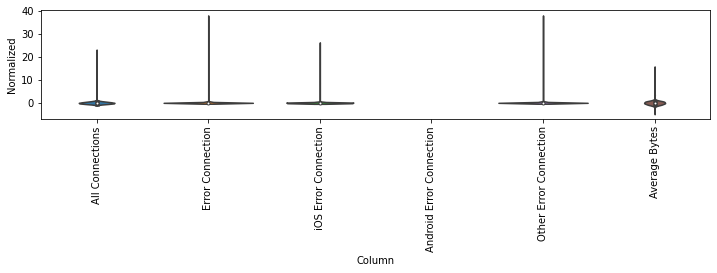

In [ ]:
df_std = (new_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 2))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(new_df.keys(), rotation=90)

## Data Windowing

Cửa số dữ liệu bao gồm 3 phần:


1.   Input width số bước thời gian đưa vào mô hình
2.   Offset 
3.   Label

Tuỳ thuộc vào mỗi mô hình và bài toán khác nhau, có hai cách tiếp cận chính:


1.   Dự đoán một đầu ra và nhiều đầu ra. Ví dụ, dự đoán giá nhà (1 đầu ra), dự đoán giá nhà và giá xe (2 đầu ra).
2.   Dự đoán tại một thời điểm và trong một khoảng thời gian.

Ví dụ:
Dự đoán giờ cuối cùng của tương lai, sử dụng 24h ngày hôm qua. 
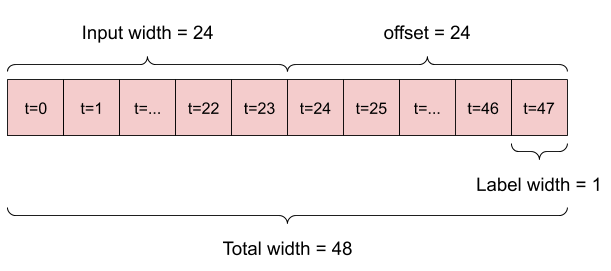

Một mô hình khác đưa ra dự đoán 1h trong tương lai bằng việc sử dụng 6h lịch sử

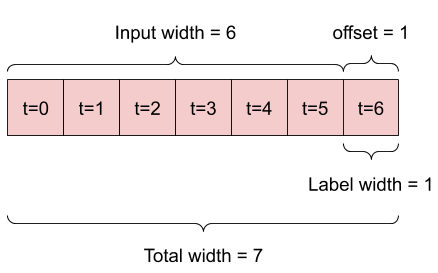



In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

### Example for Data Windowing

In [ ]:
w2 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Error Connection'])
w2

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Error Connection']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
train_df.shape

(1502, 10)

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[10:10+w2.total_window_size]),
                           np.array(train_df[20:20+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 48, 10)
Inputs shape: (3, 24, 10)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

## Visualization

In [ ]:
def plot(self, model=None, plot_col='Error Connection', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

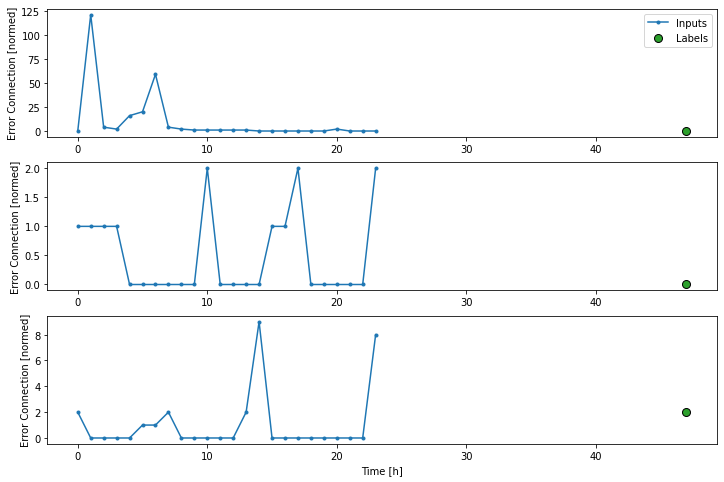

In [ ]:
w2.plot(plot_col='Error Connection')

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 24, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

### Example for input and output of model.

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 10)
Labels shape (batch, time, features): (32, 1, 1)


# Prediction

## Baseline

Trước khi xây dựng các mô hình phức tạp hơn, chúng ta sẽ xây dựn một mô hình là cơ sở để so sánh với các mô hình khác. Mô hình baseline hết sức đơn giản, sử dụng 1 bước thời gian đầu vào và dự đoán kết quả của bước tiếp theo. 

Ví dụ dự đoán số connection lỗi của giờ thứ hai dựa vào giờ đầu tiên. Tất nhiên mô hình baseline sẽ kém hiệu quả nếu dự đoán ở các bước xa hơn trong tương lai.

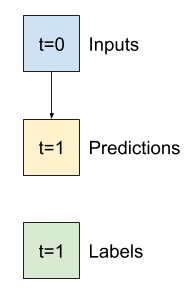

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Error Connection'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Error Connection']

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['Error Connection'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

14/14 [==============================] - 0s 3ms/step - loss: 4.0481 - mean_absolute_error: 0.7155


Chúng ta thiết kế một wide_window không thay đổi cách hoạt động của mô hình, vẫn là một đầu vào và một đầu ra. Lần này chúng ta sẽ dự đoán tất cả các giờ trong một ngày dựa vào giờ trước đó.

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Error Connection'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Error Connection']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


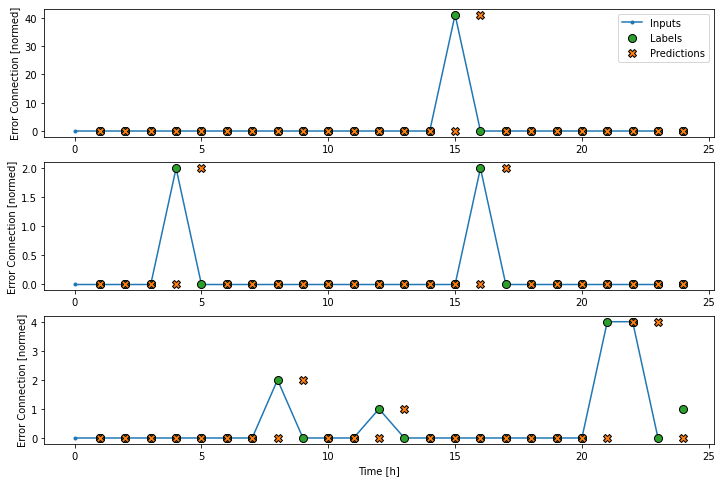

In [ ]:
wide_window.plot(baseline)

## Linear

Rõ ràng, việc chỉ dùng một giờ trước để dự đoán một giờ sau đó sẽ mang nhiều rủi ro và không hiệu quả. Để mọi thứ hiệu quả hơn, chúng ta sẽ sử dụng 24h trước đó để dự đoán kết quả của 1 giờ sau đó.

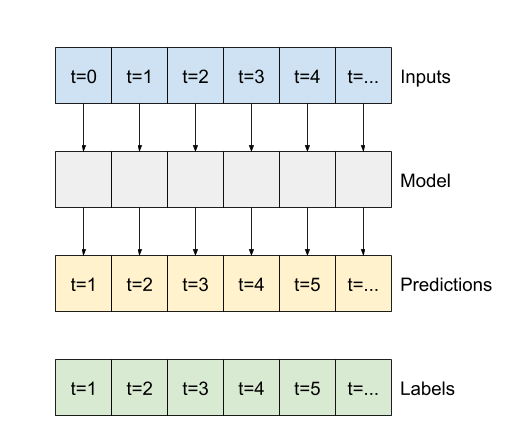

In [ ]:
CONV_WIDTH = 24
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Error Connection'])

conv_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['Error Connection']

Text(0.5, 1.0, 'Given 24h as input, predict 1h into the future.')

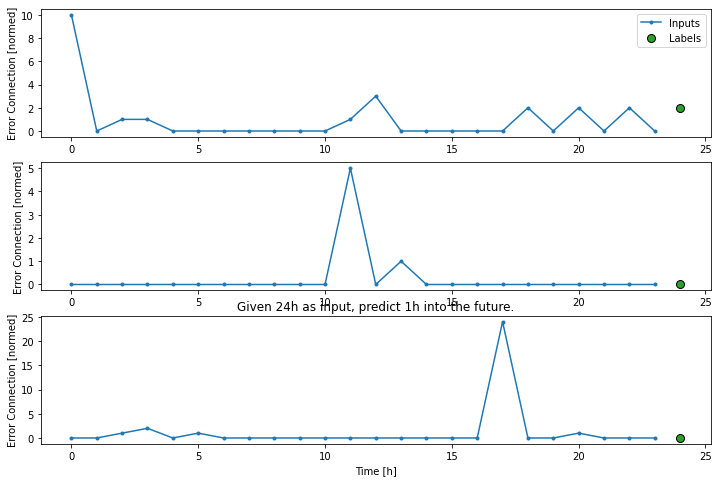

In [ ]:
conv_window.plot()
plt.title("Given 24h as input, predict 1h into the future.")

Xây dựng mô hình bằng các lớp neural network 

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):

  print("EPOCHS: ", MAX_EPOCHS)
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

#IPython.display.clear_output()
print('\n---------------------EVALUTE--------------------\n')
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

EPOCHS:  20
Epoch 1/20
47/47 [==============================] - 1s 11ms/step - loss: 183736.3289 - mean_absolute_error: 181.7192 - val_loss: 585.5436 - val_mean_absolute_error: 19.0769
Epoch 2/20
47/47 [==============================] - 0s 6ms/step - loss: 15874.8799 - mean_absolute_error: 57.7295 - val_loss: 287.3165 - val_mean_absolute_error: 13.4273
Epoch 3/20
47/47 [==============================] - 0s 6ms/step - loss: 8412.8117 - mean_absolute_error: 45.1852 - val_loss: 131.1044 - val_mean_absolute_error: 8.8853
Epoch 4/20
47/47 [==============================] - 0s 5ms/step - loss: 5747.7931 - mean_absolute_error: 34.5097 - val_loss: 160.7124 - val_mean_absolute_error: 9.8387
Epoch 5/20
47/47 [==============================] - 0s 6ms/step - loss: 4919.5920 - mean_absolute_error: 32.1172 - val_loss: 83.7667 - val_mean_absolute_error: 7.1141
Epoch 6/20
47/47 [==============================] - 0s 6ms/step - loss: 4106.0788 - mean_absolute_error: 28.3613 - val_loss: 105.2423 - val_me

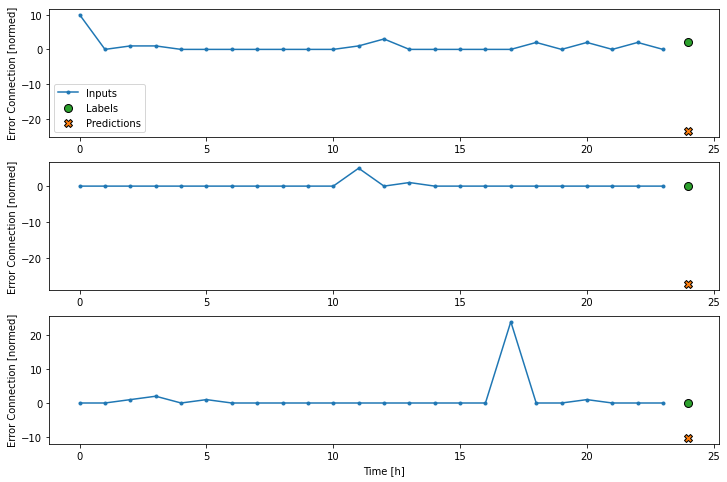

In [ ]:
conv_window.plot(multi_step_dense)

## LSTM

Ở bước này, chúng ta sẽ sử dụng mô hình Long-short time memory tương đối phổ biến đối với bài toán time series. 

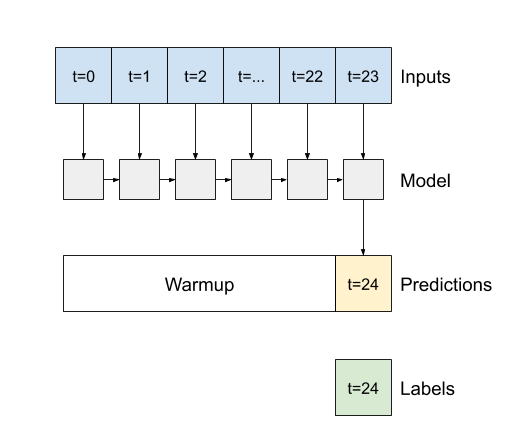

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(lstm_model, conv_window)
print('\n---------------------EVALUTE--------------------\n')
val_performance['LSTM'] = lstm_model.evaluate(conv_window.val)
performance['LSTM'] = lstm_model.evaluate(conv_window.test, verbose=0)

EPOCHS:  20
Epoch 1/20
47/47 [==============================] - 2s 16ms/step - loss: 383.2216 - mean_absolute_error: 2.0661 - val_loss: 2.2971 - val_mean_absolute_error: 0.7312
Epoch 2/20
47/47 [==============================] - 0s 8ms/step - loss: 523.8431 - mean_absolute_error: 2.1020 - val_loss: 2.3040 - val_mean_absolute_error: 0.7979
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 489.7273 - mean_absolute_error: 2.1850 - val_loss: 2.3125 - val_mean_absolute_error: 0.8218

---------------------EVALUTE--------------------

13/13 [==============================] - 0s 5ms/step - loss: 2.3125 - mean_absolute_error: 0.8218


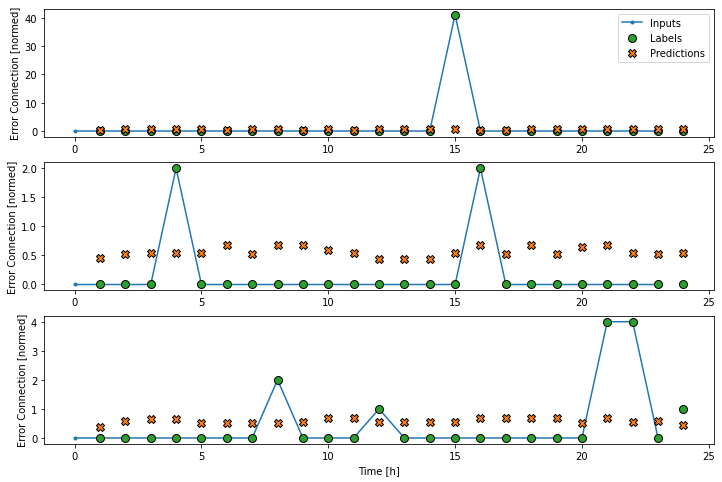

In [ ]:
wide_window.plot(lstm_model)

## Benchmark

So sánh mức độ hiệu quả của các mô hình.

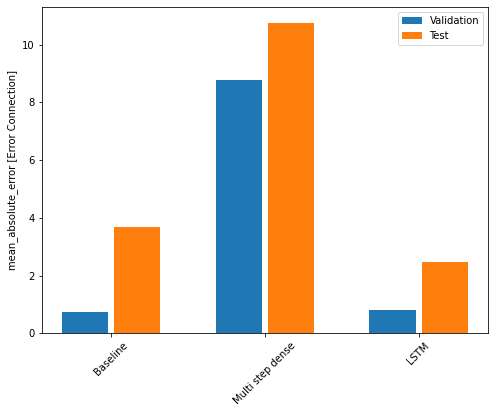

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Error Connection]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 3.6916
Multi step dense: 10.7597
LSTM        : 2.4659


Với kết quả trên dựa vào dữ liệu quan sát được, mô hình sử dụng LSTM cho kết quả tốt nhất (đánh giá dựa trên metric MAE). 

# Multi-step models

Ở phần trước, chúng ta đã sử dụng mô hình và data windowing để dự đoán kết quả một đầu ra duy nhất. 

Trong phần này, chúng ta sẽ thiết kế data windowing để có thể dự đoán nhiều giá trị trong tương lai trong một khoảng thời gian. Cần phải lưu ý rằng, kết quả của multi-step sẽ kém hiệu quả hơn rất nhiều so với single-step models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

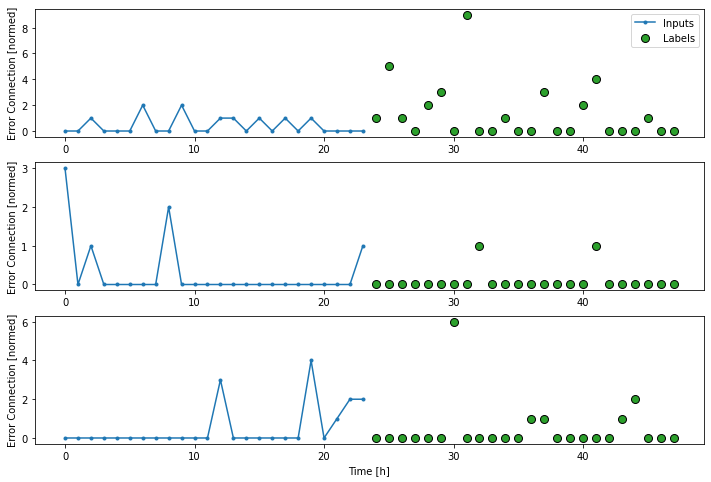

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baseline

Cũng giống như phần trước, ta xây dựng mô hình baseline dựa vào 24h lịch sử và dự đoán 24h tiếp theo

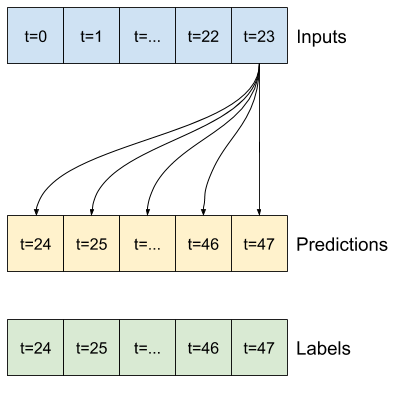

12/12 [==============================] - 0s 3ms/step - loss: 15410.4946 - mean_absolute_error: 37.4730


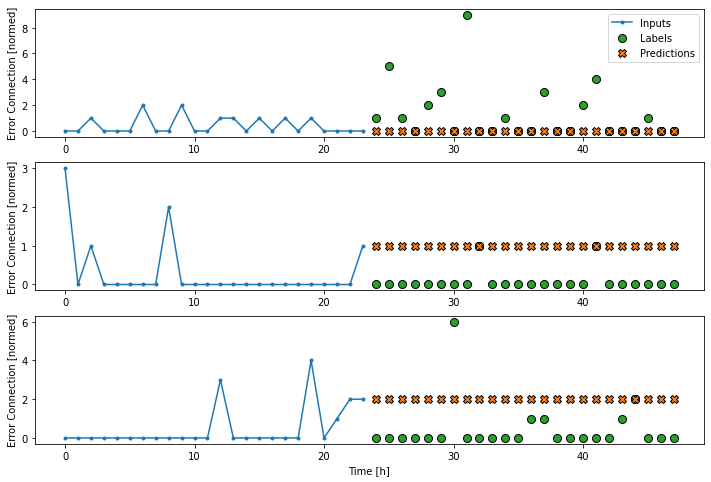

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

## Repeat

Đây là một cách khác để so sánh, chúng ta sẽ lặp lại ngày hôm trước. Ví dụ, 1h của tương lai sẽ được dự đoán bởi đầu vào 1h của ngày hôm trước. Thay vì sử dụng 24h trước đó, mô hình sẽ sử dụng từng giờ như một đầu vào.

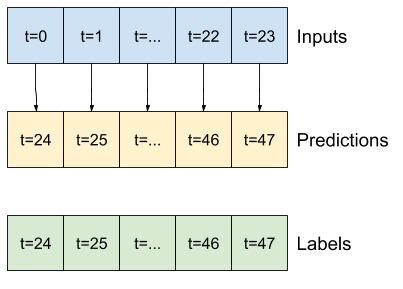

12/12 [==============================] - 0s 3ms/step - loss: 3550.5598 - mean_absolute_error: 18.5589


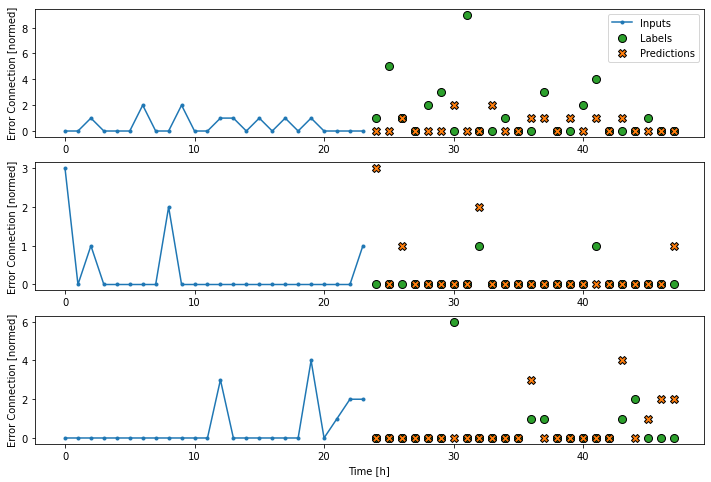

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

## Single-shot models

One high level approach to this problem is use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a layers.Dense with OUT_STEPS*features output units. The model just needs to reshape that output to the required (OUTPUT_STEPS, features).

### Linear

A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict OUTPUT_STEPS time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

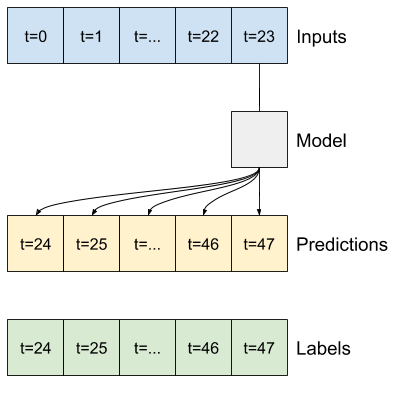

12/12 [==============================] - 0s 3ms/step - loss: 26294.5332 - mean_absolute_error: 49.1212


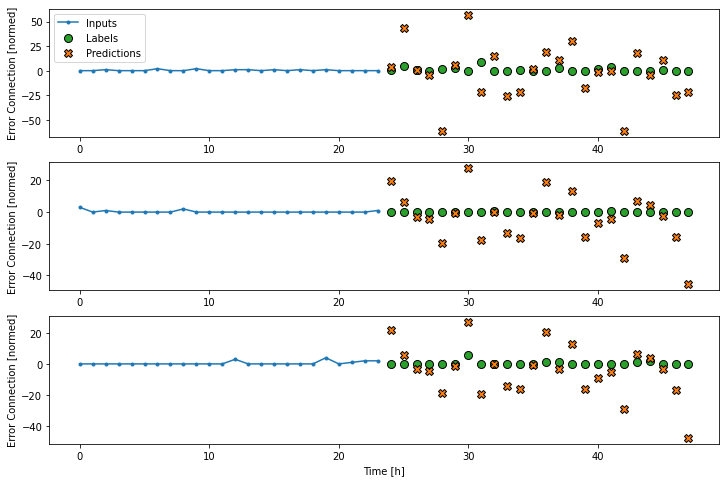

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

## LSTM

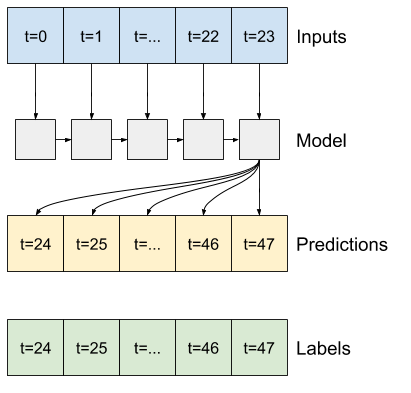

12/12 [==============================] - 0s 3ms/step - loss: 156826.5312 - mean_absolute_error: 168.0081


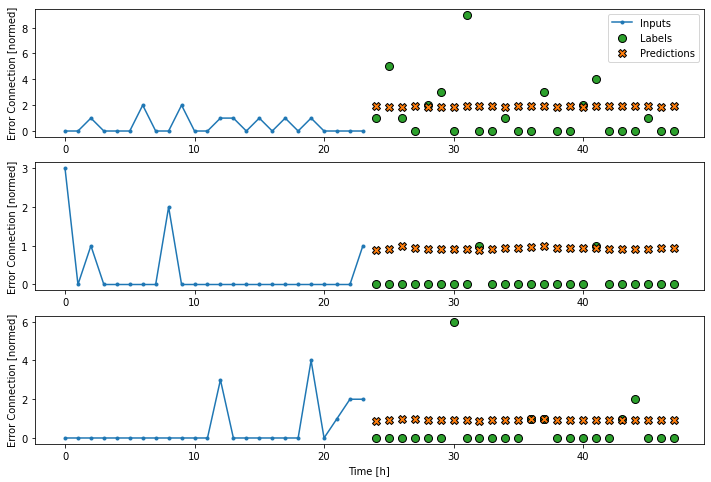

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

## Autoregressive model - LSTM

Mô hình tự hồi quy LSTM, sử dụng các kết quả đầu ra như một đầu vào của mô hình.

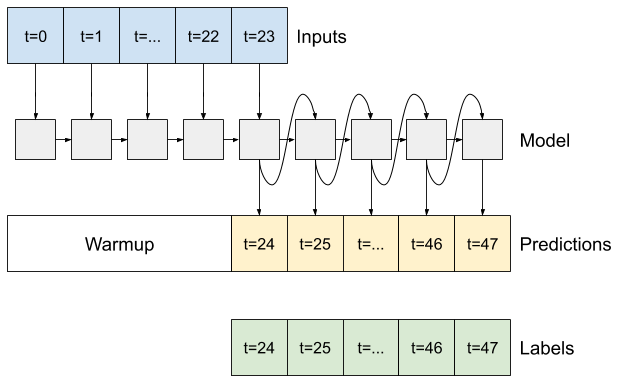

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 10])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 10)


12/12 [==============================] - 0s 8ms/step - loss: 150669.9531 - mean_absolute_error: 164.9867


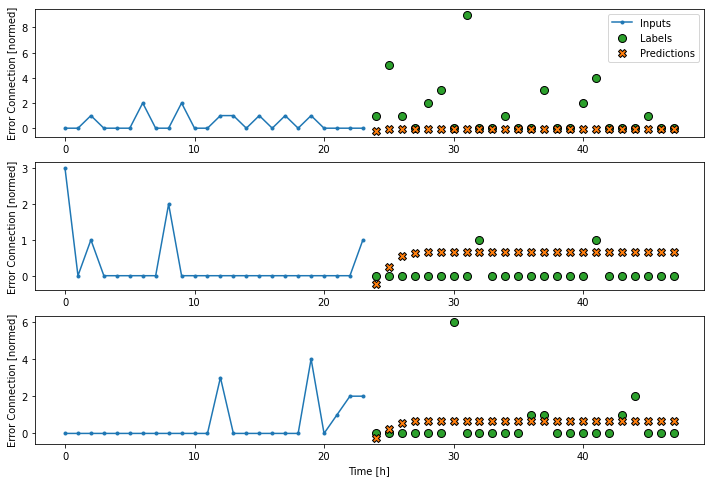

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

## Benchmark

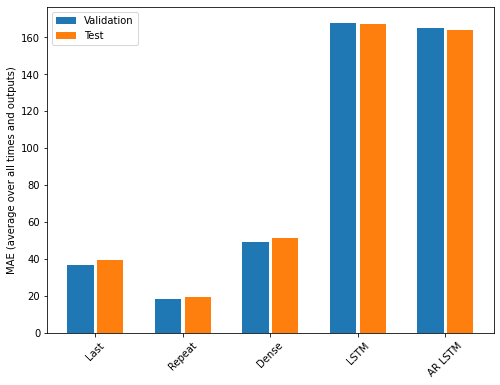

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 39.3313
Repeat  : 19.4035
Dense   : 51.2789
LSTM    : 166.9658
AR LSTM : 163.9240


Như vậy, kết quả tốt nhất là mô hình sử dụng lặp lại mỗi giờ. Điều này cho thấy với dữ liệu đầu vào, mô hình không thể đạt được các kết quả tốt.